In [1]:
import pandas as pd
from utilidades_graficas import *

In [5]:
archivo_resultados = pd.read_excel('out_op.xlsx')
archivo_resultados.head()

,platform,method,size_a,size_b,time
0,cuda,suma,100,100,0.062515
1,cuda,resta,100,100,0.000822
2,cuda,punto,100,100,0.000682
3,cuda,division,100,100,0.000781
4,cuda,multiplicacion,100,100,0.000917


In [6]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size_a'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'tiempo_promedio', 'std_tiempo']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size_a'] == tamaño]
            
            descripcion_tiempo = describir(tabla['time'])            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_tiempo ]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,tiempo_promedio,std_tiempo
0,cuda,suma,100,0.062515,NaN
1,cuda,suma,200,0.000761,NaN
2,cuda,suma,300,0.000937,NaN
3,cuda,suma,400,0.001374,NaN
4,cuda,suma,500,0.001041,NaN


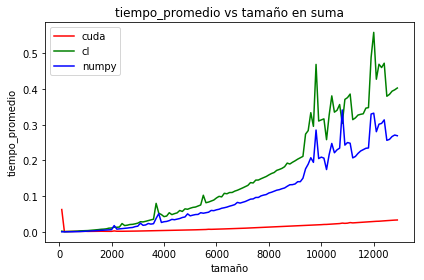

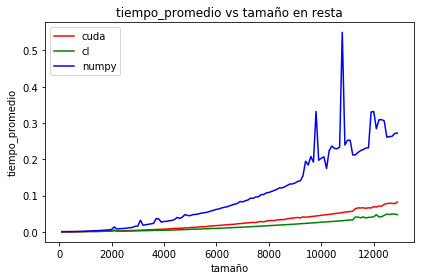

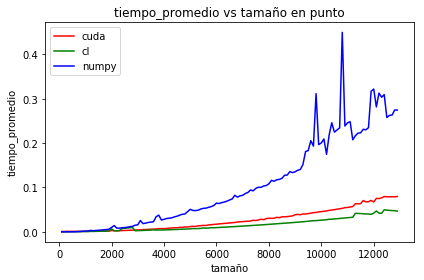

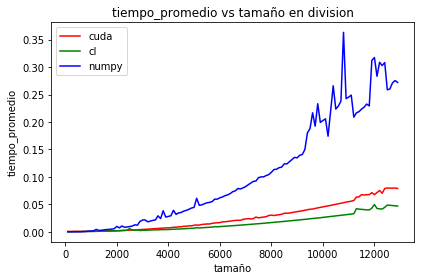

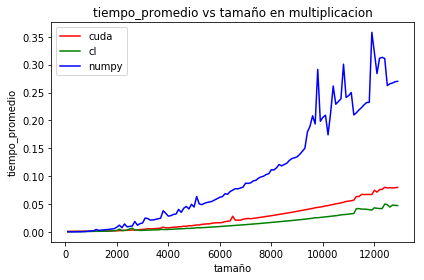

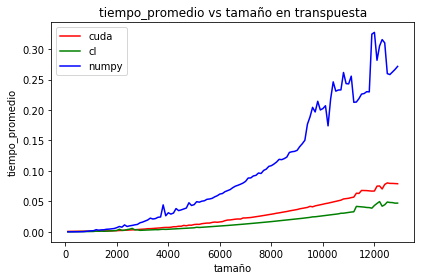

In [7]:
ys = ['tiempo_promedio']
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y, plataformas=plataformas)